# K-Nearest Neighbor Algorithm

In this notebook, we will take a look at the k-nearest neighbors (KNN) algorithm.

The KNN is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems using labels given and identifying similar data in its close proximity.

To establish the algorithm, we will use the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) again.

For this notebook we will need the following packages:
* RDatasets [documentation](https://github.com/JuliaStats/RDatasets.jl)
* Plots [documentation](http://docs.juliaplots.org/latest/)
* CSV [documentation](https://juliadata.github.io/CSV.jl/stable/)

Also, knowledge of Julia DataFrames will be needed:
* DataFrames [documentation](https://juliadata.github.io/DataFrames.jl/stable/)

In [34]:
using RDatasets
using Plots
using CSV

In [35]:
iris = dataset("datasets", "iris")

x_data = [x for x in zip(iris.SepalLength[1:30], iris.SepalWidth[1:30], iris.PetalLength[1:30])]
y_data = [iris.Species[i] for i = 1:30]

# applying the same for versicolor and virginica
for i = 51:80
    push!(x_data, (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i]))
    push!(y_data, "versicolor")
end

for i = 101:130
    push!(x_data, (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i]))
    push!(y_data, "virginica")
end

In [36]:
y_data[60]

CategoricalArrays.CategoricalValue{String,UInt8} "versicolor"

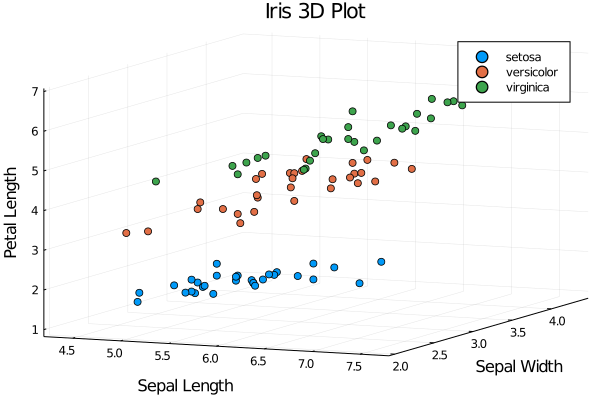

In [37]:
scatter(xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        zaxis = "Petal Length",
        title = "Iris 3D Plot")

scatter!(x_data[1:30],
        label = "setosa")

scatter!(x_data[31:60],
        label = "versicolor")

scatter!(x_data[61:90],
        label = "virginica")

#### Calculating Distance

KNN uses the distance between points on the graph to compare with other similar points. Therefore, we can use the Euclidean distance as a simple method to observe distances between two points, for example, ($p_1$ and $p_2$). The formula for calculating distance is shown below.


$$d(p_1,p_2)=\sqrt{(x_{p_1}-x_{p_2})^2+(y_{p_1}-y_{p_2})^2}$$

In [38]:
function distance(p1, p2)
    return sqrt(sum((p1[i] - p2[i])^2 for i = 1:length(p1)))
end

# Test the function euclidean_distance to make sure it works!
print("The distance between ", x_data[1]," and ", x_data[50])
println(" is ", distance(x_data[1], x_data[50]));

The distance between (5.1, 3.5, 1.4) and (5.6, 2.5, 3.9) is 2.7386127875258306


#### KNN Algorithm Steps

1. Load the data
2. Choose number of $K$ neighbors
3. Calculate the distance from desired point to all points in the dataset
4. Sort distances from smallest to largest
5. Pick the smallest $K$ distances
6. Evaluate the target for those specific neighbors
7. Retrieve the most frequent target
8. Apply that as the prediction for point

#### Advantages

* This algorithm is simple and easy to implement
* KNN can be used for both classification and regression
* Does not need to build a model, adjust parameters, or make many assumptions

#### Disadvantages
* KNN's computational speed decreases as magnitude of data increase


In [39]:
function KNN(target, feature_array, label_array, k)
    # Calculate the distance between target (point) and all other points in the feature_array
    distance_array = [(feature_array[i], label_array[i], distance(target, feature_array[i]))
                        for i = 1:length(feature_array)
                        if target != feature_array[i]
                        ]
    
    # Sort the distance array in ascending order according to distance
    sort!(distance_array, by = x -> x[3])    # Python = distance_array.sort(key = lambda x : x[2])
        
    return distance_array[1:k]
end
    

KNN (generic function with 1 method)

In [40]:
test_point(i) = (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i])

test_point (generic function with 1 method)

In [41]:
function show_neighbors(i, feature_array, label_array, k)
    println("")
    println("Target Point P = ", test_point(i))
    println("Target Label = ", iris.Species[i])
    println("k = ", k)
    println("____________________________________")
    test = KNN(test_point(i), feature_array, label_array, k)
    for i = 1:length(test)
        println("Point $i = ", test[i][1])
        println("Point Label = ", test[i][2])
        println("Point Distance = ", test[i][3])
        if i != length(test)
            println("")
        end 
    end
    println("____________________________________")
    println("")
    
    scatter(xaxis = "Sepal Length",
            yaxis = "Sepal Width", 
            zaxis = "Petal Length",
            title = "Iris Data Set Scatter Plot")

    scatter!(x_data[1:30], 
            label = "setosa")

    scatter!(x_data[31:60], 
            label = "versicolor")

    scatter!(x_data[61:90], 
            label = "virginica")
    
    scatter!([test_point(i)],
            label = "test point")
    
    for j = 1:length(test)
        plot!([test_point(i), test[j][1]],
            label = false,
            color = "red")
    end
    scatter!()  
end

show_neighbors (generic function with 1 method)


Target Point P = (4.8, 3.4, 1.9)
Target Label = setosa
k = 4
____________________________________
Point 1 = (4.8, 3.4, 1.6)
Point Label = setosa
Point Distance = 0.2999999999999998

Point 2 = (5.0, 3.4, 1.6)
Point Label = setosa
Point Distance = 0.3605551275463989

Point 3 = (4.7, 3.2, 1.6)
Point Label = setosa
Point Distance = 0.3741657386773938

Point 4 = (5.1, 3.3, 1.7)
Point Label = setosa
Point Distance = 0.374165738677394
____________________________________



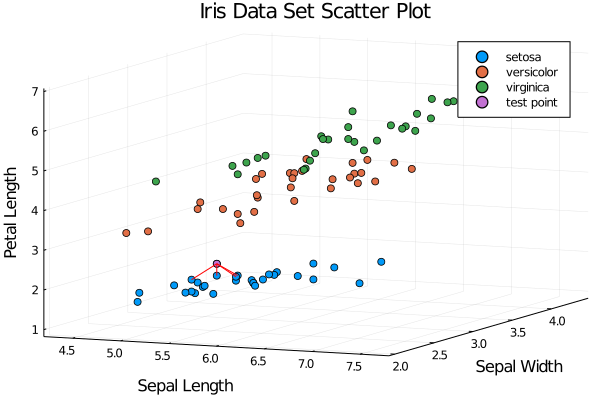

In [42]:
show_neighbors(25, x_data, y_data, 4)

In [32]:
function predict(i, feature_array, label_array, k)
    point = test_point(i)
    KNN_array = KNN(point, feature_array, label_array, k)
    setosa_count = sum([1 for x in KNN_array if x[2] == "setosa"])
    versicolor_count = sum([1 for x in KNN_array if x[2] == "versicolor"])
    virginica_count = sum([1 for x in KNN_array if x[2] == "virginica"])
    
    count_array = [("setosa", setosa_count), ("versicolor", versicolor_count), ("virginica", virginica_count)]
    sort!(count_array, by = x -> x[2])
    
    return count_array[end][1]
end      

predict (generic function with 1 method)

In [44]:
predict(143, x_data, y_data, 6)

"virginica"

In [45]:
iris.Species[143]

CategoricalArrays.CategoricalValue{String,UInt8} "virginica"

### Movie Recommendation 

 - We will use the same process as we did above with the iris dataset where we can apply KNN to the following movie reivew dataset as an example of KNN in a real world application. The "more_like_this" function makes a list of recommended movies from a movie given by the user that is very similar to the movie given. 

In [46]:
movies = CSV.read("movies_recommendation_data.csv", DataFrame)

,MovieID,MovieName,IMDBRating,Biography,Drama,Thriller
,Int64,String,Float64,Int64,Int64,Int64
1,58,The Imitation Game,8.0,1,1,1
2,8,Ex Machina,7.7,0,1,0
3,46,A Beautiful Mind,8.2,1,1,0
4,62,Good Will Hunting,8.3,0,1,0
5,97,Forrest Gump,8.8,0,1,0
6,98,21,6.8,0,1,0
7,31,Gifted,7.6,0,1,0
8,3,Travelling Salesman,5.9,0,1,0
9,51,Avatar,7.9,0,0,0


In [48]:
x_movie_data = [x for x in zip(movies.IMDBRating, movies.Biography, movies.Drama, movies.Thriller)]
y_movie_data = [x for x in movies.MovieName]

30-element Array{String,1}:
 "The Imitation Game"
 "Ex Machina"
 "A Beautiful Mind"
 "Good Will Hunting"
 "Forrest Gump"
 "21"
 "Gifted"
 "Travelling Salesman"
 "Avatar"
 "The Karate Kid"
 "A Brilliant Young Mind"
 "A Time To Kill"
 "Interstellar"
 ⋮
 "Finding Forrester"
 "The Fountain"
 "The DaVinci Code"
 "Stand and Deliver"
 "The Terminator"
 "21 Jump Street"
 "The Avengers"
 "Thor: Ragnarok"
 "Spirit: Stallion of the Cimarron"
 "Hacksaw Ridge"
 "12 Years a Slave"
 "Queen of Katwe"

In [49]:
x_movie_data[1]

(8.0, 1, 1, 1)

In [56]:
function more_like_this(movie_name, features, labels, k)
    for i = 1:length(labels)
        if labels[i] == movie_name
            neighbors = KNN(features[i], features, labels, k)
            println("These are the top $k similar movies to $movie_name:")
            for j = 1:k
                println("$j. ", neighbors[j][2])
            end
        end
    end
end

more_like_this (generic function with 1 method)

In [61]:
more_like_this("The Terminator", x_movie_data, y_movie_data, 10)

These are the top 10 similar movies to The Terminator:
1. Avatar
2. The Avengers
3. Thor: Ragnarok
4. Black Panther
5. Spirited Away
6. The Fountain
7. 21 Jump Street
8. Inception
9. Spirit: Stallion of the Cimarron
10. The Wolf of Wall Street
